In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification

class logistic_regression():    
    def __init__(self):        
        self.params = dict()
        self.grads = dict()

    #定义sigmoid 函数
    def sigmoid(self, x):
        z = 1 / (1 + np.exp(-x))        
        return z    
        
    def initialize_params(self, dims):
        W = np.zeros((dims, 1))
        b = 0
        return W, b    
    
    def logistic(self, X, y, W, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]
        
        #过激活函数sigmoid
        sig = self.sigmoid(np.dot(X, W) + b)
        #计算交叉熵损失logloss
        cost = -1 / num_train * np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig))
        
        #对w和b 进行求导
        dW = np.dot(X.T, (sig - y)) / num_train
        db = np.sum(sig - y) / num_train
        
        return sig, cost, dW, db    
        
    def logistic_train(self, X, y, learning_rate, epochs):
        W, b = self.initialize_params(X.shape[1])
        np.random.seed(1024)
#         W = np.random.normal(loc=0.0, scale=1.0, size=(X.shape[1],1))
#         b = np.random.normal(loc=0.0, scale=1.0)
        cost_list = []
        for i in range(epochs):
            sig, cost, dW, db = self.logistic(X, y, W, b )
            W = W  - learning_rate * dW
            b = b - learning_rate * db            
            if i % 100 == 0:
                cost_list.append(cost)
                learning_rate = learning_rate*0.9
                print('epoch %d learning_rate %f' % (i, learning_rate))
                print('epoch %d cost %f' % (i, cost))

        self.params = {
            'W': W, 
            'b': b
        }
        self.grads = {            
            'dW': dW,            
            'db': db
        }
        
        params = self.params
        grads = self.grads
        return cost_list, params, grads    
        
    def predict(self, X):
        y_prediction = self.sigmoid(np.dot(X, self.params['W']) + self.params['b'])        
        for i in range(len(y_prediction)):            
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0

        return y_prediction    
            
    def accuracy(self, y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):            
            for j in range(len(y_pred)):                
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1

        accuracy_score = correct_count / len(y_test)        
        return accuracy_score    
        
    def create_data(self):
        X, labels = make_classification(n_samples=1000, n_features=10, n_redundant=0, n_informative=2, random_state=9999, n_clusters_per_class=2)
        labels = labels.reshape((-1, 1))
        offset = int(X.shape[0] * 0.9)
        X_train, y_train = X[:offset], labels[:offset]
        X_test, y_test = X[offset:], labels[offset:]        
        return X_train, y_train, X_test, y_test    
        
    def plot_logistic(self, X_train, y_train):
        n = X_train.shape[0]
        xcord1 = []
        ycord1 = []
        xcord2 = []
        ycord2 = []        
        for i in range(n):            
            if y_train[i] == 1:
                xcord1.append(X_train[i][0])
                ycord1.append(X_train[i][1])            
            else:
                xcord2.append(X_train[i][0])
                ycord2.append(X_train[i][1])
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=32, c='red')
        ax.scatter(xcord2, ycord2, s=32, c='green')
        x = np.arange(-1.5, 3, 0.1)
        y = (-self.params['b'] - self.params['W'][0] * x) / self.params['W'][1]
        ax.plot(x, y)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

            


(900, 10) (900, 1) (100, 10) (100, 1)
epoch 0 learning_rate 0.090000
epoch 0 cost 0.693147
epoch 100 learning_rate 0.081000
epoch 100 cost 0.250935
epoch 200 learning_rate 0.072900
epoch 200 cost 0.210005
epoch 300 learning_rate 0.065610
epoch 300 cost 0.195482
epoch 400 learning_rate 0.059049
epoch 400 cost 0.188259
epoch 500 learning_rate 0.053144
epoch 500 cost 0.184031
epoch 600 learning_rate 0.047830
epoch 600 cost 0.181304
epoch 700 learning_rate 0.043047
epoch 700 cost 0.179427
epoch 800 learning_rate 0.038742
epoch 800 cost 0.178072
epoch 900 learning_rate 0.034868
epoch 900 cost 0.177059
{'W': array([[ 0.01764171],
       [ 0.05281011],
       [-1.01911467],
       [ 0.08052901],
       [-0.1299209 ],
       [ 0.14002261],
       [ 3.28689833],
       [ 0.11689399],
       [-0.01766918],
       [ 0.0620695 ]]), 'b': -0.03838378906155777}
train accuracy is: 0.9488888888888889
test accuracy is: 0.89


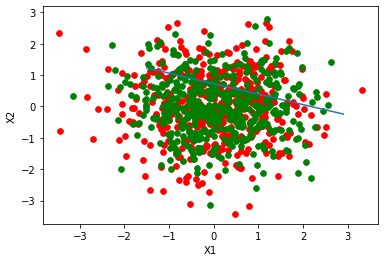

In [2]:
if __name__ == "__main__":
    model = logistic_regression()
    X_train, y_train, X_test, y_test = model.create_data()
#     print(X_train)
#     print(y_train)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    cost_list, params, grads = model.logistic_train(X_train, y_train, 0.1, 1000)
    print(params)
    y_train_pred = model.predict(X_train)
    accuracy_score_train = model.accuracy(y_train, y_train_pred)
    print('train accuracy is:', accuracy_score_train)
    y_test_pred = model.predict(X_test)
    accuracy_score_test = model.accuracy(y_test, y_test_pred)
    print('test accuracy is:', accuracy_score_test)
    model.plot_logistic(X_train, y_train)

(299, 21) (299, 1) (67, 21) (67, 1)
epoch 0 learning_rate 0.001350
epoch 0 cost 0.693147
epoch 100 learning_rate 0.001215
epoch 100 cost 0.804309
epoch 200 learning_rate 0.001094
epoch 200 cost 0.712609
epoch 300 learning_rate 0.000984
epoch 300 cost 0.626879
epoch 400 learning_rate 0.000886
epoch 400 cost 0.583565
epoch 500 learning_rate 0.000797
epoch 500 cost 0.580937
epoch 600 learning_rate 0.000717
epoch 600 cost 0.578789
epoch 700 learning_rate 0.000646
epoch 700 cost 0.577004
epoch 800 learning_rate 0.000581
epoch 800 cost 0.575501
epoch 900 learning_rate 0.000523
epoch 900 cost 0.574224
{'W': array([[ 0.05100809],
       [ 0.0225263 ],
       [ 0.03616253],
       [-0.01368758],
       [ 0.00845648],
       [-0.02633091],
       [-0.03501991],
       [-0.08922226],
       [-0.00473925],
       [-0.05921469],
       [ 0.02711793],
       [-0.02467887],
       [ 0.04674653],
       [-0.02396765],
       [-0.05312281],
       [ 0.03059063],
       [-0.02037861],
       [ 0.0002380

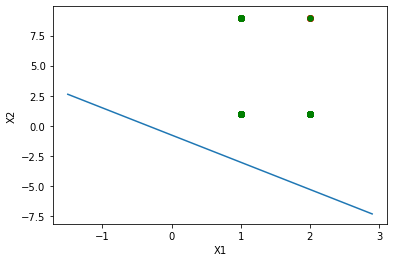

In [4]:
import pandas as pd
from sklearn.utils import shuffle
col_name = ['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16','N17','N18','N19','N20','N21',"label"]
Train_data = pd.read_csv('horseColicTraining.txt',index_col=None, header=None, sep='\t', names = col_name)
Train_data = shuffle(Train_data)

Test_data = pd.read_csv('horseColicTest.txt',index_col=None, header=None, sep='\t', names = col_name)
Test_data = (shuffle(Test_data))
# print(Train_data.head())
# print(Train_data.columns)
y_train = Train_data.pop('label')
y_train = np.array(y_train).reshape((-1, 1))
y_eval = Test_data.pop('label')
y_eval = np.array(y_eval).reshape((-1, 1))
Train_data = np.array(Train_data)
Test_data = np.array(Test_data)

model = logistic_regression()
X_train, y_train, X_test, y_test = Train_data, y_train,Test_data, y_eval
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# print(X_train)
# print(y_train)
cost_list, params, grads = model.logistic_train(X_train, y_train, 0.0015, 1000)
print(params)
y_train_pred = model.predict(X_train)
accuracy_score_train = model.accuracy(y_train, y_train_pred)
print('train accuracy is:', accuracy_score_train)
y_test_pred = model.predict(X_test)
accuracy_score_test = model.accuracy(y_test, y_test_pred)
print('test accuracy is:', accuracy_score_test)
model.plot_logistic(X_train, y_train)